Importamos las librerías necesarias para el funcionamiento del código.

In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model
import numpy as np
import os

Creamos las etiquetas para cada clase

In [9]:
labels = {
    0: 'Bean',
    1: 'Broccoli',
    2: 'Cabbage',
    3: 'Carrot',
    4: 'Pumpkin',
    5: 'Tomato',
}

Cargamos el modelo tanto en el formato h5 como keras

In [10]:
model = load_model('Vegetable_Classification.h5')

In [11]:
model2 = load_model('Vegetable_Classification.keras')

La demostración de las predicciones se llevó a cabo utilizando un conjunto de imágenes de muestra obtenidas de la web. Estas imágenes se hallan organizadas en la carpeta "examples", con la misma separación que se utilizó en la creación del modelo, es decir, separación por clases. Esto facilita la comparación de las predicciones con las categorías originales.

In [12]:
# Inicializar listas vacías para almacenar las predicciones, etiquetas originales y las imágenes
prediction = []  # Almacena las predicciones del modelo
original = []    # Almacena las etiquetas originales de las imágenes
image = []       # Almacena las imágenes cargadas

# Inicializar un contador
count = 0

# Directorio que contiene los ejemplos de imágenes a procesar
examples_path = 'examples'

# Iterar a través de las subcarpetas dentro de 'examples_path'
for i in os.listdir(examples_path):
    # Iterar a través de los archivos de imagen dentro de cada subcarpeta
    for item in os.listdir(os.path.join(examples_path, i)):
        # Cargar la imagen y cambiar su tamaño a 150x150 píxeles
        img = tf.keras.utils.load_img(os.path.join(examples_path, i, item), target_size=(150, 150))
        image.append(img)  # Agregar la imagen a la lista 'image'

        # Convertir la imagen a un arreglo numpy y normalizar los valores de píxeles (escala de 0 a 1)
        img = np.array(img)
        img = img / 255.0

        # Reorganizar la forma del arreglo de la imagen para que sea (1, 150, 150, 3) que es la forma esperada por el modelo
        img = img.reshape(1, 150, 150, 3)

        # Realizar una predicción utilizando el modelo
        predict = model.predict(img)

        # Obtener el índice de la clase con mayor probabilidad (argmax)
        predict = np.argmax(predict)

        # Agregar la etiqueta predicha a la lista 'prediction'
        prediction.append(labels[predict])

        # Agregar la etiqueta original a la lista 'original'
        original.append(i)

1/1 [==============================] - 0s 95ms/step


In [13]:
# Crear una lista 'n' para almacenar índices que corresponden a las imágenes
n = []

# Iterar a través de un rango que va desde 0 hasta la longitud de la lista 'image'
for i in range(len(image)):
    # Agregar el índice actual 'i' a la lista 'n'
    n.append(i)

Visualizamos las predicciones

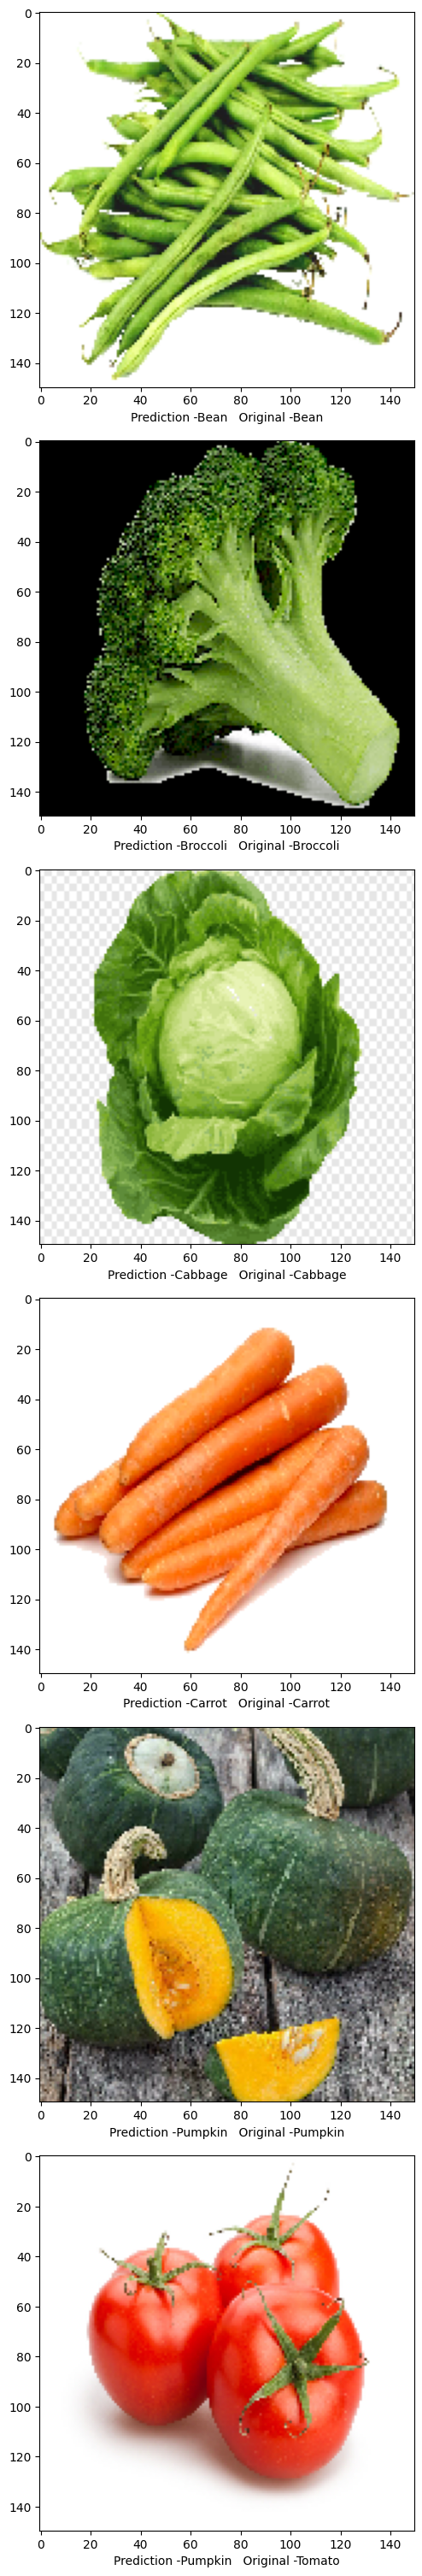

In [14]:
# Crear una figura (gráfico) con un tamaño de 100x100 pulgadas
fig = plt.figure(figsize=(100, 100))

# Iterar a través de los índices almacenados en la lista 'n'
for i in n:
    # Agregar un nuevo subgráfico a la figura con 20 filas, 1 columna y un índice 'i+1'
    fig.add_subplot(20, 1, i + 1)

    # Configurar el texto en el subgráfico para mostrar la predicción y la etiqueta original
    plt.xlabel("Predicción - " + prediction[i] + "   Original - " + original[i])

    # Mostrar la imagen correspondiente en el subgráfico
    plt.imshow(image[i])

# Ajustar el diseño de la figura para que los subgráficos no se superpongan
fig.tight_layout()

# Mostrar la figura que contiene los subgráficos con las imágenes y las etiquetas
plt.show()